In [2]:
from __future__ import division
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, lasso_path
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

/Users/nicholasharrigan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nicholasharrigan/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# Generate some random data:
x_plot = np.r_[0:1:100j]
def f(x):
    return np.sin(2*np.pi*x)
X = np.random.uniform(0,1,size=100)[:,None]
Y = f(X) + np.random.normal(scale=0.3, size=100)[:,None]
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

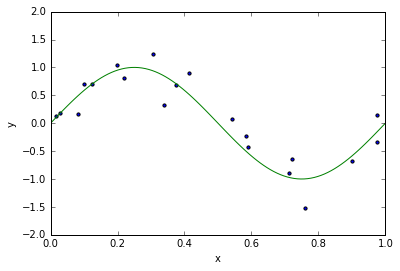

In [4]:
ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='green')
ax.scatter(X_train, y_train, s=10)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')

In [5]:
# Create pipeline for adding polynomial features and then producing linear regression
lin_pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

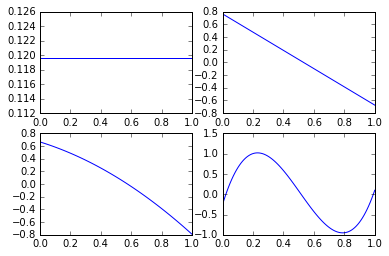

In [6]:
# Loop over different polynomial dimensions and get fit in each case
fig, ax = plt.subplots(2,2)
mse_train = []
mse_test = []
for axis, deg in zip(ax.ravel(), range(0,4)):
    lin_pipe.set_params(polynomialfeatures__degree=deg)
    lin_pipe.fit(X_train, y_train)
    axis.plot(x_plot, lin_pipe.predict(x_plot[:,None]))
    # Store mean squared error on train and test set
    mse_train.append(mean_squared_error(y_train, lin_pipe.predict(y_train)))
    mse_test.append(mean_squared_error(y_test, lin_pipe.predict(y_test)))

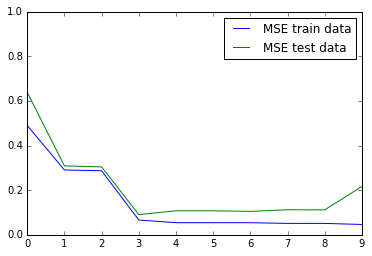

In [7]:
mse_train = []
mse_test = []
top_deg = 10
for deg in range(top_deg):
    lin_pipe.set_params(polynomialfeatures__degree=deg)
    lin_pipe.fit(X_train, y_train)
    # Store mean squared error on train and test set
    mse_train.append(mean_squared_error(y_train, lin_pipe.predict(X_train)))
    mse_test.append(mean_squared_error(y_test, lin_pipe.predict(X_test)))
plt.plot(range(top_deg), mse_train, label='MSE train data')
plt.plot(range(top_deg), mse_test, label='MSE test data')
plt.ylim((0.0, 1e0))
plt.legend()

In [8]:
def plot_train(lin_fit, plt_ax, alpha):
    """Plot prediction over training data and ground truth"""
    plt_ax.scatter(X_train,y_train)
    plt_ax.plot(x_plot, f(x_plot), color='green')
    plt_ax.plot(x_plot, lin_fit.predict(x_plot[:,None]), color='red', label="alpha=%s"%alpha)
    plt_ax.set_ylim(-1.5,1.5)
    plt_ax.set_xlim(0,1)
    plt_ax.legend()

def plot_coeffs(lin_fit, plt_ax):
    """Plot coefficients of fit"""
    coeffs = lin_fit.steps[-1][1].coef_.ravel()
    plt_ax.plot(np.abs(coeffs), marker='o')

## Ridge regression

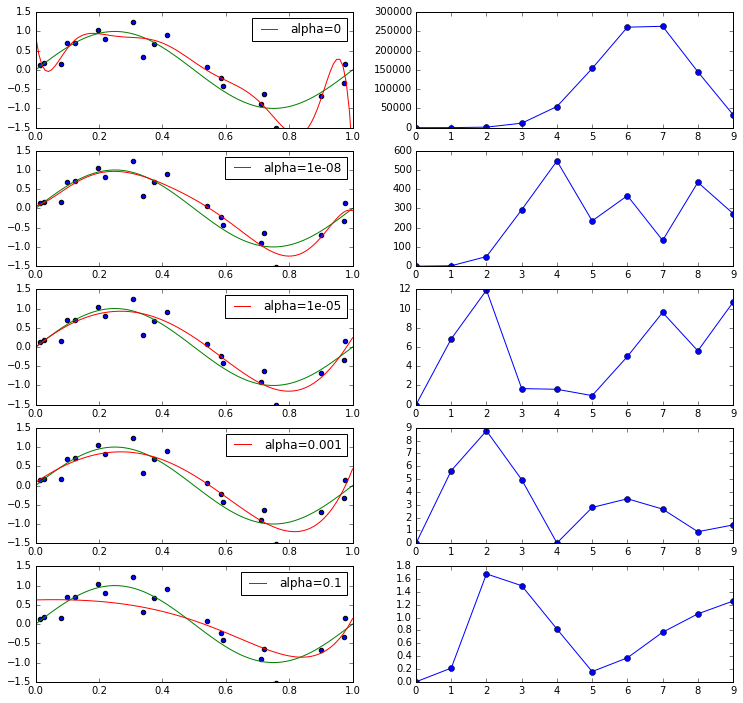

In [9]:
# Perform ridge regression for different regularization parameters
# Setup plot for showing results
degree=9
regs = [0, 1e-8, 1e-5, 1e-3, 1e-1]
fig, axis = plt.subplots(len(regs),2, figsize=(len(regs)*2.5, 12))
axes = zip(axis[:,0],axis[:,1])
# Loop over alpha values 
for ax, alpha in zip(axes, regs):
    # Set alpha value in ridge regression
    ridge_pipe = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
#     ridge_pipe.set_params(ridge__alpha=alpha)
    # Fit to data
    ridge_pipe.fit(X_train, y_train)
    plot_train(ridge_pipe, ax[0], alpha)
    plot_coeffs(ridge_pipe, ax[1])
#     ax.scatter(X_train, y_train)
#     ax.plot(x_plot, ridge_pipe.predict(x_plot[:,None]))
#     ax.set_ylim(-1.5,1.5)
#     ax.set_xlim(0,1)

## LASSO Regression

/Users/nicholasharrigan/anaconda/lib/python2.7/site-packages/sklearn/pipeline.py:166: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.steps[-1][-1].fit(Xt, y, **fit_params)
/Users/nicholasharrigan/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:462: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/nicholasharrigan/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


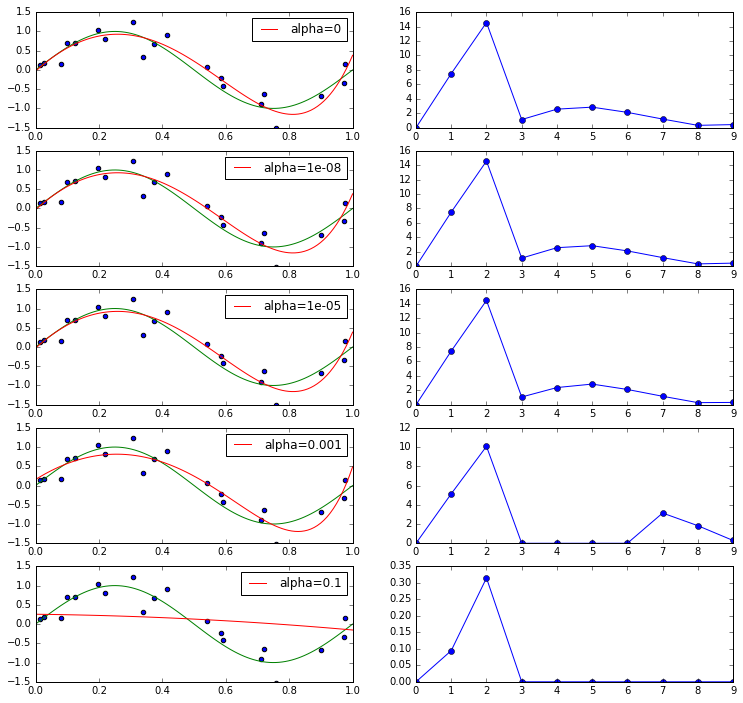

In [10]:
# Perform LASSO regression for different regularization parameters
degree=9
regs = [0, 1e-8, 1e-5, 1e-3, 1e-1]
fig, axis = plt.subplots(len(regs),2, figsize=(len(regs)*2.5, 12))
axes = zip(axis[:,0],axis[:,1])
for ax,alpha in zip(axes,regs):
    lasso_pipe = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=1000))
    lasso_pipe.fit(X_train, y_train)
    plot_train(lasso_pipe, ax[0], alpha)
    plot_coeffs(lasso_pipe, ax[1])

## Elastic Net Regression

Note that in Elastic Net regression there are two regularization parameters, specifying the linear contribution of the L1 and L2 norms to the regularization term in the Lagrangian (eg: aL1 + bL2). In SKLearn, the ElasticNet estimator has parameters alpha = a + b and l1_ratio = a/(a+b) - i.e. l1_ratio is the proportion of regularization that gets L1. If we use GridSearchCV then we should build a parameter matrix that varies both of these.

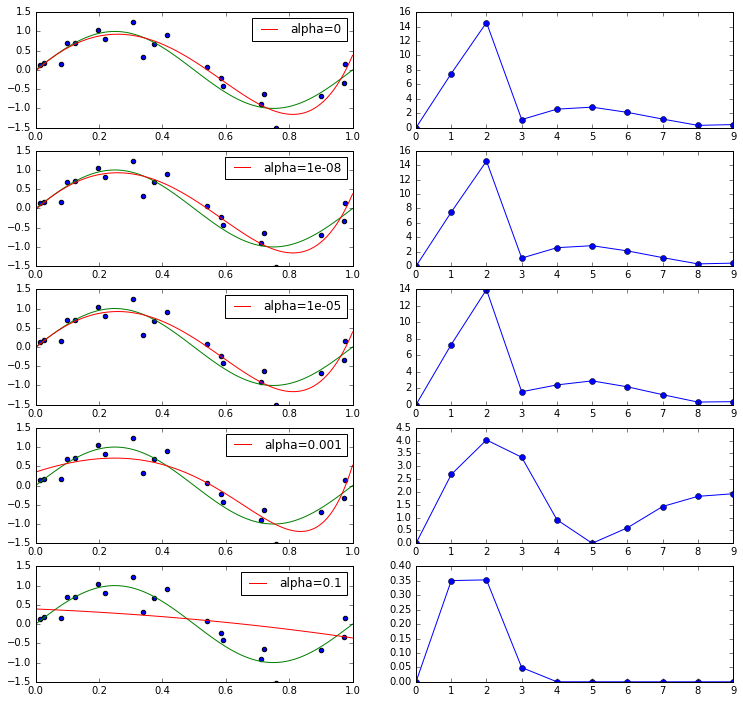

In [11]:
# Perform Elastic Net regression for different regularization parameters
degree=9
regs = [0, 1e-8, 1e-5, 1e-3, 1e-1]
fig, axis = plt.subplots(len(regs),2, figsize=(len(regs)*2.5, 12))
axes = zip(axis[:,0],axis[:,1])
for ax,alpha in zip(axes,regs):
    EN_pipe = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=0.5))
    EN_pipe.fit(X_train, y_train)
    plot_train(EN_pipe, ax[0], alpha)
    plot_coeffs(EN_pipe, ax[1])

## Regularization path plots

Regularization path plots show how the coefficients of each polynomial term vary as the regularization parameter is varied (note that for Elastic Net this is therefore technically a 3D plot, unless we fix l_ratio or alpha). 

In [12]:
def plot_reg_path(X_train, y_train, degree=0, reg_type="lasso", poly=False, axis = plt):
    """Plot regularization path plot for giving training data
    Specify type of regularization to use from Ridge/Lasso/Elastic
    Optionally also finds polynomial terms up to given degree"""
    # Find polynomial features of training data if necessary    
    if not poly:
        poly = PolynomialFeatures(9)
        X_train2 = poly.fit_transform(X_train)
    if reg_type.lower()=="lasso":
        # Use convenient lasso_path builtin
        alphas, coefs, _ = lasso_path(X_train2, y_train)
        coefs = coefs[0,:,:]
    elif reg_type.lower() == "ridge":
        # No builtin(?!) so explicitly generate reg path
        alphas = np.r_[5.6e-2:5.6e-5:100j]
        ridge_fit = Ridge()
        coefs = []
        for alpha in alphas:
            ridge_fit.set_params(alpha=alpha)
            ridge_fit.fit(X_train2, y_train)
            coefs.append(ridge_fit.coef_[0])
        coefs = np.array(coefs).T
    elif reg_type.lower() == "elastic":
        # No builtin(?!) so explicitly generate reg path
        alphas = np.r_[5.6e-2:5.6e-5:100j]
        elastic_fit = ElasticNet()
        coefs = []
        for alpha in alphas:
            elastic_fit.set_params(alpha=alpha)
            elastic_fit.fit(X_train2, y_train)
            coefs.append(elastic_fit.coef_)
        coefs = np.array(coefs).T
        print coefs.shape
    for i in coefs:
        axis.plot(-np.log10(alphas), i)
    axis.set_xlim(min(-np.log10(alphas)), max(-np.log10(alphas)))
    axis.set_xlabel('-Log(alpha)')
    axis.set_ylabel('coeffs')

(10, 100)


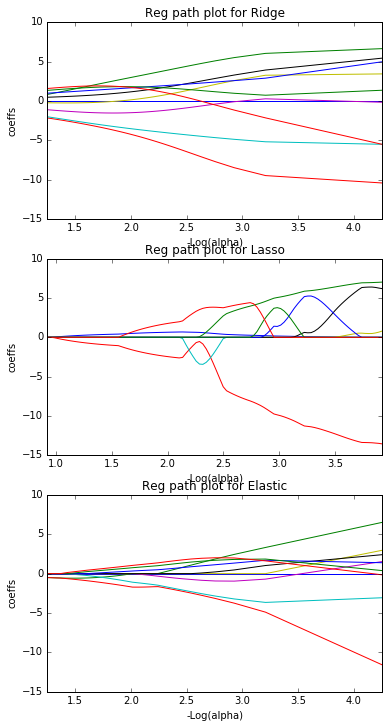

In [13]:
# Regularization path plots for regularization types
fig, ax = plt.subplots(3,1, figsize=(6,12))
regs = ["Ridge", "Lasso", "Elastic"]
for reg_type, axis in zip(regs,ax.ravel()):
    plot_reg_path(X_train, y_train, 9, reg_type=reg_type, axis=axis)
    axis.set_title("Reg path plot for %s" %reg_type)

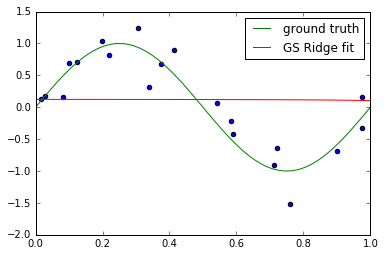

In [17]:
new_pipe = make_pipeline(PolynomialFeatures(15), Ridge(alpha=1000))
new_pipe.fit(X_train, y_train);
plt.scatter(X_train, y_train)
plt.plot(x_plot, f(x_plot), color='green', label = "ground truth")
plt.plot(x_plot, new_pipe.predict(x_plot[:,None]), color='red', label="GS Ridge fit")
plt.xlim((0,1))
plt.legend();

## Grid Search CV
Grid search can be used to search for (non-learned) model parameters (*hyperparameters*) that do best in a cross-validated score evaluating the estimators performance. For example, the regularization coefficient alpha in regularized regression. First a note on Cross validation, which can be seperately implemented using cross_validation.cross_val_score:

### Cross validation

In [13]:
# Perform CV on a simple polynomial ridge regression pipeline with alpha=0.1
ridge_pipe = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.1))
# cross_val_score takes the estimator and training data, and an argument cv which specifies
# what CV to use. Passing an integer < Ntraining specifies k-folds CV with cv folds
print cross_val_score(ridge_pipe, X_train, y_train, cv=5) # Returns all 5 cross validations
# Get mean score and standard deviation from cross validations
cv_scores = cross_val_score(ridge_pipe, X_train, y_train, cv=5)
print "mean = %s, std = %s" %(cv_scores.mean(), cv_scores.std())

[ 0.53026129 -3.1521692   0.56160775 -2.31925663  0.01140055]
mean = -0.87363124732, std = 1.55535683801


See this for more information on standard deviations in CV http://stats.stackexchange.com/questions/169260/cross-validation-what-is-the-standard-deviation-if-the-same-value-is-obtained-f

### Grid Search for Ridge regression regularization parameter

GridSearchCV *exhaustively* cross-validates (with some specified score) different specified combinations of parameters for estimators. From this we can extract the highest scoring parameters

Note that parameter grids are specified by dicts of lists, with the keys of the dict being the names of the parameters, and the lists being the values to try. Also note that we produce a pipeline and **then** apply GridSearchCV to the whole pipeline (we don't insert a gridsearch into the pipeline)

In [14]:
# Pipeline for polynomial ridge regression. Note we use full pipeline constructor in order to 
# conveniently name steps in the pipeline
ridge_pipe = Pipeline([('poly',PolynomialFeatures(9)), ('ridge',Ridge())])
# Create paramter grid. Vary alpha in the ridge regression. Note that address parameters
# using the double underscore pipeline syntax
alpha_vals = np.array([np.linspace(10**(-x), 10**(-x+1), 10) for x in range(1,8)]).ravel()
param_grid = {'ridge__alpha': alpha_vals}
# Perform 10-fold CV on this pipeline. Note that if no scoring parameter passed then defaults
# to estimators 'score' property.
ridgeGS = GridSearchCV(ridge_pipe, param_grid, scoring='mean_squared_error', cv=10)
# Crucially now fit the GridSearchCV to our training data
ridgeGS.fit(X_train, y_train);

Now that we have fitted GridSearchCV for our pipeline *this does not in itself give us our fitted estimator*. We can obtain this using the best_estimator property of the GridSearchCV object. There are similar methods for finding the best scores, and coefficients etc... 

-0.193861600114
{'ridge__alpha': 1.0000000000000001e-05}


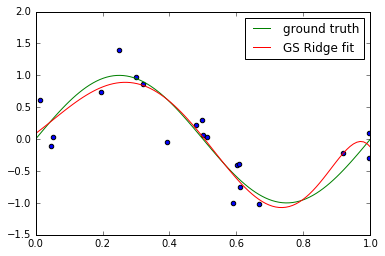

In [15]:
# Get best score found in the grid search (NOTE: mean_squared_error has it's sign flipped here
# because of some internal details - CV only maximizes, so it is negated before passed to it)
print ridgeGS.best_score_
# Get parameter choices that gave the best score:
print ridgeGS.best_params_
# This would print out a list of all paramters tried and their associated scores.
ridgeGS.grid_scores_
# This convenience allows us to immediately obtain the estimator with the optimal parameters:
ridge_best = ridgeGS.best_estimator_
# Plot predictions made by the optimal estimator against data and ground truth
plt.scatter(X_train, y_train)
plt.plot(x_plot, f(x_plot), color='green', label = "ground truth")
plt.plot(x_plot, ridge_best.predict(x_plot[:,None]), color='red', label="GS Ridge fit")
plt.xlim((0,1))
plt.legend();

When calling GridSearchCV we pass an estimator, a (potentially list of) dicts expressing parameter grids to search over, and a string denoting a *scoring method* (see http://scikit-learn.org/stable/modules/model_evaluation.html for model evaluation scoring methods). Note that if we don't pass a scoring method explicitly then GridSearchCV resorts to the default score for that esimator (estimator.score)

Note that we could also include hyperparameters in our parameter-grid from other steps in the pipeline, such as pre-processing. Below we also do a 10-fold cross-validated gridsearch over the order of polynomial to use:  

-0.176168455563
{'poly__degree': 14, 'ridge__alpha': 0.0001}


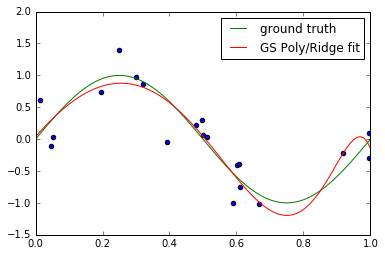

In [16]:
# Redefine pipeline without specific degree of polynomial preprocessing
ridge_pipe = Pipeline([('poly',PolynomialFeatures()), ('ridge',Ridge())])
# define alpha values to then use in parameter grid
alpha_vals = np.array([np.linspace(10**(-x), 10**(-x+1), 5) for x in range(1,8)]).ravel()
# Define parameter grid - including polynomial hyperparameter using pipeline __ naming notation
param_grid = {'ridge__alpha': alpha_vals, 'poly__degree': np.arange(10)}
# GridSearchCV with new parameter grid on pipeline
polyridgeGS = GridSearchCV(ridge_pipe, param_grid, scoring='mean_squared_error', cv=10)
# Fit GridSearchCV to training data
polyridgeGS.fit(X_train, y_train)
# Get best estimator from gridsearch
polyridge_best = polyridgeGS.best_estimator_
# Print out best score and associated best parmaters - now includes polynomial degree
print polyridgeGS.best_score_
print polyridgeGS.best_params_
# Plot predictions made by the optimal estimator against data and ground truth
plt.scatter(X_train, y_train)
plt.plot(x_plot, f(x_plot), color='green', label = "ground truth")
plt.plot(x_plot, polyridge_best.predict(x_plot[:,None]), color='red', label="GS Poly/Ridge fit")
plt.xlim((0,1))
plt.legend();

### Grid Search for Elastic Net 

In [1]:
# Note that we first build a pipeline and then APPLY GRIDSEARCHCV TO THE *PIPELINE*
enet_pipe = Pipeline([('poly', PolynomialFeatures(9)),('enet', ElasticNet())])
# Choose values for alpha and l1_ratio
alpha_vals = np.array([np.linspace(10**-x, 10**(-x+1),10) for x in range(9)]).ravel()
l1_vals = np.linspace(0,1,20)
# Note that we refer to parameters within a pipeline using notation NAME__PARAM, 
# where NAME is the name we give to the element (auto assigned if use make_pipeline)
param_grid = {'poly__degree': range(10), 'enet__alpha': alpha_vals, 'enet__l1_ratio': l1_vals}
# Create GridSearchCV instance with mean-squared-error and 10-fold CV
enetGS = GridSearchCV(enet_pipe, param_grid, scoring='mean_squared_error', cv=10);
# Train grid search on training data
enetGS.fit(X_train, y_train);
# Get highest scoring estimator from grid search
enet_best = enetGS.best_estimator_
# Print out best scores and parameters
print enetGS.best_score_
print enetGS.best_params_
# Plot prediction with training data and ground truth
plt.scatter(X_train, y_train)
plt.plot(x_plot, f(x_plot), color='green', label = "ground truth")
plt.plot(x_plot, enet_best.predict(x_plot[:,None]), color='red', label="GS Ridge fit")
plt.xlim((0,1))
plt.legend();

NameError: name 'Pipeline' is not defined

### Permutation test of significance for CV score

## Todo:
* Repeat for elastic net
* Understand difference between/when to use coordinate descent versus SGD
* Document description of bias/variance tradeoff
* Document/understand differences between different regularization approaches
 * When to use each one
 * Bayesian interpretation of each approach in terms of priors
 * http://stats.stackexchange.com/questions/93181/ridge-lasso-and-elastic-net
 * http://stats.stackexchange.com/questions/60952/coefficients-paths-comparison-of-ridge-lasso-and-elastic-net-regression
 * http://www.slideshare.net/ShangxuanZhang/ridge-regression-lasso-and-elastic-net
 * http://www.r-bloggers.com/kickin-it-with-elastic-net-regression/
* Understand Least Angle Regression for model selection: http://statweb.stanford.edu/~tibs/ftp/lars.pdf and http://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression
* **Cross validation**
* **Consideraations with CV** http://robotics.stanford.edu/~ang/papers/cv-final.pdf
* **Choosing k in k-fold CV** http://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation
* **Permutation tests for significance of CV???**: 
    * http://stats.stackexchange.com/questions/112410/high-standard-deviation-for-leave-one-out-cross-validation
    * https://en.wikipedia.org/wiki/Resampling_%28statistics%29#Permutation_tests
* **Understand when to use different CV iterators**: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
* **F1 scores and other model evaluation tools in detail**: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
* **Feature selection within pipeline (and cross-validated)**
    * http://scikit-learn.org/stable/modules/feature_selection.html
    * http://www.cs.cornell.edu/~mmunson/publications/docs/fs-bagging.pdf
* **Using ANOVA for feature selection**
* **Scaling within pipeline (and cross-validated): eg: preprocessing.StandardScaler()**
* **Look up ligthning dataviz API**

Andrew Ng coursenotes: http://cs229.stanford.edu/materials.html

http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/regularized-linear-regression.ipynb

READ THIS!: http://www.holehouse.org/mlclass/index.html